In [76]:
#Install gdal which is required for geopandas and og2ogr for subsetting the data
#conda install -c conda-forge gdal
#download the data from the BC Data Catalogue
#https://catalogue.data.gov.bc.ca/dataset/vri-2022-forest-vegetation-composite-layers-all-layers-
#wget https://pub.data.gov.bc.ca/datasets/02dba161-fdb7-48ae-a4bb-bd6ef017c36d/current/VEG_COMP_POLY_AND_LAYER_2022.gdb.zip
#unzip VEG_COMP_POLY_AND_LAYER_2022.gdb.zip
#select the relevant columns from the two layers - the first layer has the polygon geometry and the second layer has the attributes

#Download the key for the species IDs and make in to a csv file
#https://www2.gov.bc.ca/gov/content/industry/forestry/managing-our-forest-resources/tree-seed/tree-seed-centre/seed-testing/codes


#ogr2ogr code
#ogr2ogr -f "CSV" -select "FEATURE_ID, POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,COAST_INTERIOR_CD,SOIL_MOISTURE_REGIME_1" ./VEG_POLY_FILTERED_2.csv VEG_COMP_POLY_AND_LAYER_2022.gdb VEG_COMP_POLY
#ogr2ogr -f "CSV" -select "FEATURE_ID, LAYER_ID, CROWN_CLOSURE, SPECIES_CD_1, SPECIES_PCT_1, SPECIES_CD_2, SPECIES_PCT_2, PROJ_AGE_1, PROJ_AGE_CLASS_CD_1, PROJ_AGE_2, PROJ_AGE_CLASS_CD_2, PROJ_HEIGHT_1, PROJ_HEIGHT_CLASS_CD_1,  PROJ_HEIGHT_1, PROJ_HEIGHT_CLASS_CD_2, WHOLE_STEM_BIOMASS_PER_HA,BRANCH_BIOMASS_PER_HA,FOLIAGE_BIOMASS_PER_HA,BARK_BIOMASS_PER_HA" ./VEG_COMP_FILTERED_2.csv VEG_COMP_POLY_AND_LAYER_2022.gdb VEG_COMP_LAYER

#Prodices the following files
#./VEG_POLY_FILTERED_2.csv 
#./VEG_COMP_FILTERED_2.csv

#install geopandas and fiona

#conda install -c conda-forge geopandas
#conda install -c conda-forge fiona

In [156]:
#Open the various files and combine them in to a single dataframe

import pandas as pd

pd.set_option('display.max_columns',None)

VEG_POLY_FILTERED=pd.read_csv('VEG_POLY_FILTERED_2.csv')

#Remove the geometry area column
#VEG_POLY_FILTERED.drop(columns='GEOMETRY_AREA',inplace=True )

VEG_COMP_FILTERED=pd.read_csv('VEG_COMP_FILTERED_2.csv')
#SPECIES=pd.read_csv('species_key.csv')


In [ ]:
#Show the first few rows of the data

In [157]:
VEG_POLY_FILTERED.head(5)
#FEATURE_ID is the unique feature - unclear exactly what a feature is
#Polygon ID is the unique polygon ID, which is the geographic boundary
#Area of the polygon in HA
#Area of the feature in square meters, this seems approximately the same as the polygon area, why have both? Need to check and mauybe ask for confirmation
#Geometry area - not extracted proeprly so leave it out next time


,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,COAST_INTERIOR_CD,SOIL_MOISTURE_REGIME_1
0,3614486,455,0.2,2.134647e+03,C,NaN
1,3601726,49,0.7,6.901566e+03,C,NaN
2,3603090,719,1.2,1.206879e+04,C,NaN
3,3703295,259,400.0,3.999504e+06,C,NaN
4,3598407,872,2.0,2.000486e+04,C,NaN


In [158]:
VEG_COMP_FILTERED.head(5)
#https://www2.gov.bc.ca/assets/gov/farming-natural-resources-and-industry/forestry/stewardship/forest-analysis-inventory/data-management/standards/vegcomp_poly_rank1_data_dictionaryv5_2019.pdf
#FEATURE_ID is the unique feature - unclear exactly what a feature is. Used to join to previous table
#Layer ID is The unique business identification of a layer, or horizontal stratum, in a stand. Each layer is normally characterized 
#   as a distinct canopy containing a common forest cover structure with timer of similar ages (at least 40 years between layers) and heights 
#   (at least 10 meters between layers). Layers are assigned from the tallest layer downward.
#   Each layer is normally characterized as a distinct canopy containing a common forest cover structure with timber of similar ages 
#   (at least 40 years between layers) and heights (at least 10 meters between layers).
#   Layers are assigned from the tallest layer downward.
# I think a layer of D is Dead/Diseased. https://www.arcgis.com/home/item.html?id=f789f1177f2f480da3788bde3e2a4784

#CROWN_CLOSURE is Tree crown closure is the percentage of ground area covered by the vertically projected crowns of the tree cover 
#   for each tree layer within the polygon and provides 
#   an essential estimate of the vertical projection of tree crowns upon the ground.

#SPECIES_CD_1 is the species code for the first / moat abundant species
#SPECIES_PCT_1 is the percentage of the first species
#PROJ_AGE_1 is the projected age of the first species
#PROJ_AGE_CLASS_CD_1 is the projected age class of the first species
#   The age class projected to the current year for species 1.
#   1 Stand age 1 to 20 years
#   2 Stand age 21 to 40 years
#   3 Stand age 41 to 60 years
#   4 Stand age 61 to 80 years
#   5 Stand age 81 to 100 years
#   6 Stand age 101 to 120 years
#   7 Stand age 121 to 140 years
#   8 Stand age 141 to 250 years
#   9 Stand age 251 + years
#PROJ_HEIGHT_1 is the projected height of the first species
#PROJ_HEIGHT_CLASS_CD_1 is the projected height class of the first species
#   The height class projected to the current year for species 1.
#   0 0m
#   1 0.1-10.4m
#   2 10.5-19.4m
#   3 19.5-28.4m
#   4 28.5-37.4m
#   5 37.5-46.4m
#   6 46.5-55.4m
#   7 55.5-64.4m
#   8 64.5 +


,FEATURE_ID,LAYER_ID,CROWN_CLOSURE,SPECIES_CD_1,SPECIES_PCT_1,SPECIES_CD_2,SPECIES_PCT_2,PROJ_AGE_1,PROJ_AGE_CLASS_CD_1,PROJ_AGE_2,PROJ_AGE_CLASS_CD_2,PROJ_HEIGHT_1,PROJ_HEIGHT_CLASS_CD_1,PROJ_HEIGHT_2,PROJ_HEIGHT_CLASS_CD_2,WHOLE_STEM_BIOMASS_PER_HA,BRANCH_BIOMASS_PER_HA,FOLIAGE_BIOMASS_PER_HA,BARK_BIOMASS_PER_HA
0,17998913,1,75.0,FDC,85.0,HW,15.0,259.0,9.0,259.0,9.0,38.299999,5.0,35.400002,4.0,422.372,82.242,36.999,72.211
1,17893810,1,20.0,PLI,55.0,FDI,45.0,157.0,8.0,157.0,8.0,22.299999,3.0,24.500000,3.0,56.009,8.456,5.752,6.568
2,7566415,1,3.0,BL,100.0,NaN,NaN,196.0,8.0,NaN,NaN,15.200000,2.0,NaN,NaN,7.752,5.187,4.220,1.678
3,18878002,1,10.0,SX,80.0,AT,10.0,151.0,8.0,151.0,8.0,30.100000,4.0,29.700001,4.0,52.448,11.330,8.227,7.370
4,3124273,1,40.0,PL,80.0,SE,20.0,91.0,5.0,NaN,NaN,15.700000,2.0,NaN,NaN,63.060,9.205,6.131,7.247


In [8]:
SPECIES.head(5)


,Vegetation Code,Description
0,AC,Poplar
1,ACT,Black Cottonwood
2,AT,Trembling Aspen
3,AX,Poplar Hybrid
4,BA,Amabilis Fir


In [159]:
VRI=pd.merge(VEG_POLY_FILTERED, VEG_COMP_FILTERED, on='FEATURE_ID', how='inner')

# First merge on the SPECIES_CD_1 column
#VRI = pd.merge(VRI,SPECIES, how='left', left_on='SPECIES_CD_1', right_on='Vegetation Code').rename(columns={'Description': 'SPECIES_name_1'})
#VRI.drop(columns='Vegetation Code',inplace=True)
# Then merge on the SPECIES_CD_2 column
#VRI = pd.merge(VRI,SPECIES, how='left', left_on='SPECIES_CD_2', right_on='Vegetation Code').rename(columns={'Description': 'SPECIES_name_2'})
#VRI.drop(columns='Vegetation Code',inplace=True)


In [19]:
#Rearrange column order

# Get the current order of the columns
columns = list(VRI.columns)

# Remove the columns you want to move
columns.remove('SPECIES_name_1')
columns.remove('SPECIES_name_2')

# Insert the columns at the desired positions
columns.insert(columns.index('SPECIES_CD_1') + 1, 'SPECIES_name_1')
columns.insert(columns.index('SPECIES_CD_2') + 1, 'SPECIES_name_2')

# Rearrange the columns
VRI = VRI[columns]



In [160]:

#sort the columns in case they haven't been

VRI.sort_values(by=['POLYGON_ID','FEATURE_ID','LAYER_ID'], inplace=True)

In [108]:
VRI.to_csv("merged.csv")

In [199]:
VRI.POLYGON_AREA=VRI.FEATURE_AREA_SQM/10000

In [113]:
VRI[VRI.SPECIES_PCT_1==100]

,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,COAST_INTERIOR_CD,SOIL_MOISTURE_REGIME_1,LAYER_ID,CROWN_CLOSURE,SPECIES_CD_1,SPECIES_PCT_1,SPECIES_CD_2,SPECIES_PCT_2,PROJ_AGE_1,PROJ_AGE_CLASS_CD_1,PROJ_AGE_2,PROJ_AGE_CLASS_CD_2,PROJ_HEIGHT_1,PROJ_HEIGHT_CLASS_CD_1,WHOLE_STEM_BIOMASS_PER_HA,BRANCH_BIOMASS_PER_HA,FOLIAGE_BIOMASS_PER_HA,BARK_BIOMASS_PER_HA
3081356,1977708,1,52.4,523730.3820,I,3.0,1,2.0,BL,100.0,NaN,NaN,150.0,8.0,NaN,NaN,23.500000,3.0,30.913,15.078,11.076,5.904
5833874,2036954,1,26.8,268454.5848,I,NaN,1,3.0,FD,100.0,NaN,NaN,161.0,8.0,NaN,NaN,24.100000,3.0,13.769,5.817,5.405,2.903
751034,2037681,1,11.4,113666.7283,I,NaN,1,30.0,BL,100.0,NaN,NaN,181.0,8.0,NaN,NaN,14.600000,2.0,27.389,14.746,11.192,5.439
250190,2041083,1,2.8,27572.4046,I,NaN,1,30.0,BL,100.0,NaN,NaN,131.0,7.0,NaN,NaN,15.900000,2.0,33.010,15.359,11.103,6.189
1432361,2053564,1,17.0,169627.3586,C,NaN,1,40.0,FD,100.0,NaN,NaN,356.0,9.0,NaN,NaN,25.100000,3.0,139.055,40.754,25.522,26.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796260,19190725,99999899,1.4,13944.9471,I,3.0,D,NaN,PL,100.0,NaN,NaN,86.0,5.0,NaN,NaN,21.299999,3.0,0.000,0.000,0.000,0.000
2811726,15351146,99999936,3.4,34014.5530,I,4.0,D,NaN,PLI,100.0,NaN,NaN,100.0,5.0,NaN,NaN,18.100000,2.0,0.000,0.000,0.000,0.000
4268189,12575540,99999968,23.1,230602.6923,I,3.0,1,10.0,PLI,100.0,NaN,NaN,126.0,7.0,NaN,NaN,21.700001,3.0,42.146,6.928,5.002,5.217
4268188,12575540,99999968,23.1,230602.6923,I,3.0,D,NaN,PL,100.0,NaN,NaN,40.0,2.0,NaN,NaN,9.000000,1.0,0.000,0.000,0.000,0.000


In [117]:
import pandas as pd
import numpy as np

# Specify the column name
column_name = 'PROJ_AGE_1'

# Define the bin edges
bin_edges = np.arange(start=VRI[column_name].min(), stop=VRI[column_name].max(), step=20)

# Create bins
VRI['bin'] = pd.cut(VRI['PROJ_AGE_1'], bins=bin_edges)



In [142]:
#VRI[VRI['bin'] == pd.Interval(900.0, 920.0, closed='right')]
VRI['area_1']=VRI['POLYGON_AREA']*VRI['SPECIES_PCT_1']/100

/var/folders/z8/bdfgj46n0f35hl782vtp2zdm0000gr/T/ipykernel_55277/1215679250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VRI.groupby('bin')['area_1'].sum().reset_index().sort_values(by='bin').plot(x='bin',y='area_1',kind='bar')


<Axes: xlabel='bin'>

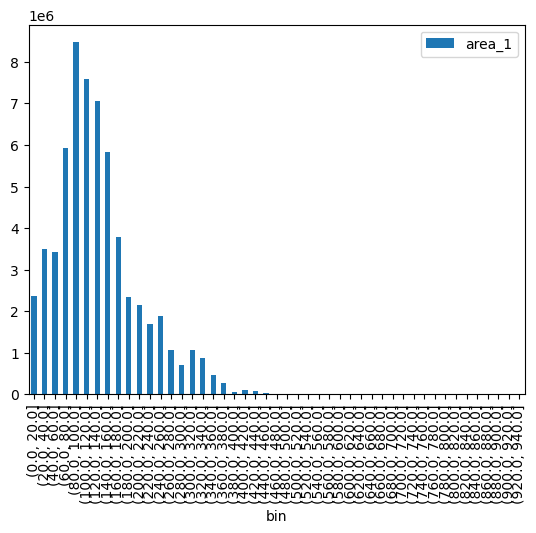

In [153]:
VRI.groupby('bin')['area_1'].sum().reset_index().sort_values(by='bin').plot(x='bin',y='area_1',kind='bar')

In [200]:
VRI1=VRI[['FEATURE_ID',
 'POLYGON_ID',
 'POLYGON_AREA',
 'FEATURE_AREA_SQM',
 'LAYER_ID',
 'SPECIES_CD_1',
 'SPECIES_PCT_1',
 'PROJ_AGE_1',
 'PROJ_AGE_CLASS_CD_1',
 'PROJ_HEIGHT_1',
 'PROJ_HEIGHT_CLASS_CD_1',
 'SPECIES_CD_2',]]

VRI1.rename(columns={'SPECIES_CD_1':'SPECIES_CD','SPECIES_PCT_1':'SPECIES_PCT','PROJ_AGE_1':'PROJ_AGE','PROJ_AGE_CLASS_CD_1':'PROJ_AGE_CLASS_CD','PROJ_HEIGHT_1':'PROJ_HEIGHT','PROJ_HEIGHT_CLASS_CD_1':'PROJ_HEIGHT_CLASS_CD','SPECIES_CD_2':'partner'},inplace=True)

VRI2=VRI[['FEATURE_ID',
 'POLYGON_ID',
 'POLYGON_AREA',
 'FEATURE_AREA_SQM',
 'LAYER_ID',
 'SPECIES_CD_2',
 'SPECIES_PCT_2',
 'PROJ_AGE_2',
 'PROJ_AGE_CLASS_CD_2',
 'PROJ_HEIGHT_2',
 'PROJ_HEIGHT_CLASS_CD_2',
 'SPECIES_CD_1']]

VRI1.loc[:, 'order'] = 1
VRI2.loc[:, 'order'] = 2

VRI2.rename(columns={'SPECIES_CD_2':'SPECIES_CD','SPECIES_PCT_2':'SPECIES_PCT','PROJ_AGE_2':'PROJ_AGE','PROJ_AGE_CLASS_CD_2':'PROJ_AGE_CLASS_CD','PROJ_HEIGHT_2':'PROJ_HEIGHT','PROJ_HEIGHT_CLASS_CD_2':'PROJ_HEIGHT_CLASS_CD','SPECIES_CD_1':'partner'},inplace=True)

VRI3=pd.concat([VRI1,VRI2])

VRI3.sort_values(by=['FEATURE_ID','POLYGON_ID','LAYER_ID','order'], inplace=True)

# Specify the column name
column_name = 'PROJ_AGE'

# Define the bin edges
bin_edges = np.arange(start=VRI3[column_name].min(), stop=VRI3[column_name].max(), step=20)

# Create bins
VRI3['age_bin'] = pd.cut(VRI3['PROJ_AGE'], bins=bin_edges)
#add a column that gives the bin number as an integer from 1 to n
VRI3['age_bin_num'] = pd.cut(VRI3['PROJ_AGE'], bins=bin_edges, labels=False)


VRI3['area_species']=VRI3['POLYGON_AREA']*VRI3['SPECIES_PCT']/100



/var/folders/z8/bdfgj46n0f35hl782vtp2zdm0000gr/T/ipykernel_55277/758285264.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VRI1.rename(columns={'SPECIES_CD_1':'SPECIES_CD','SPECIES_PCT_1':'SPECIES_PCT','PROJ_AGE_1':'PROJ_AGE','PROJ_AGE_CLASS_CD_1':'PROJ_AGE_CLASS_CD','PROJ_HEIGHT_1':'PROJ_HEIGHT','PROJ_HEIGHT_CLASS_CD_1':'PROJ_HEIGHT_CLASS_CD','SPECIES_CD_2':'partner'},inplace=True)
/var/folders/z8/bdfgj46n0f35hl782vtp2zdm0000gr/T/ipykernel_55277/758285264.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VRI1.loc[:, 'order'] = 1
/var/folders/z8/bdfgj46n0

/var/folders/z8/bdfgj46n0f35hl782vtp2zdm0000gr/T/ipykernel_55277/3381955082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VRI3.groupby('age_bin')['area_species'].sum().reset_index().sort_values(by='age_bin').plot(x='age_bin',y='area_species',kind='bar',figsize=(50,7))


<Axes: xlabel='age_bin'>

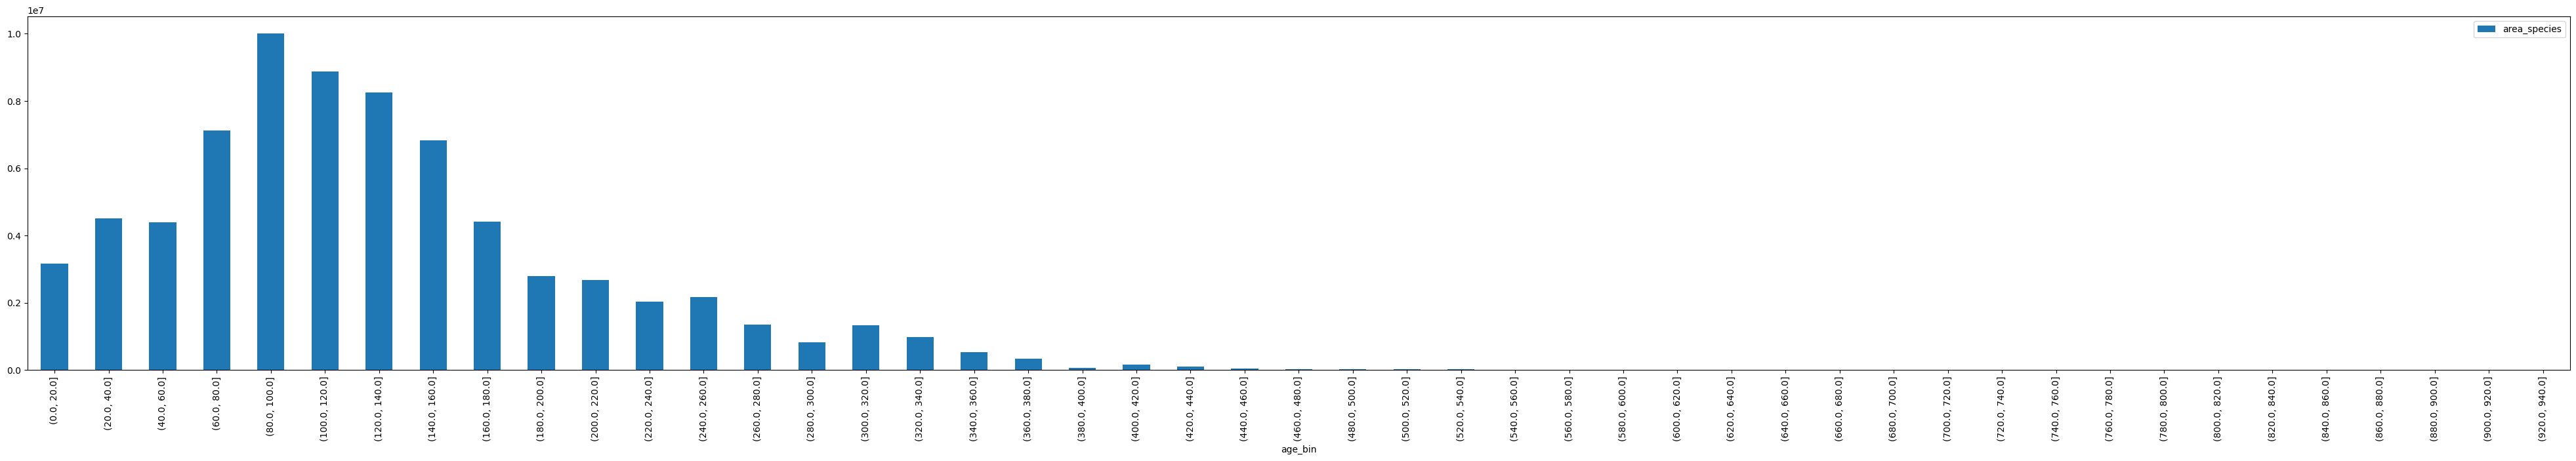

In [201]:
VRI3.groupby('age_bin')['area_species'].sum().reset_index().sort_values(by='age_bin').plot(x='age_bin',y='area_species',kind='bar',figsize=(50,7))

<Axes: xlabel='SPECIES_CD'>

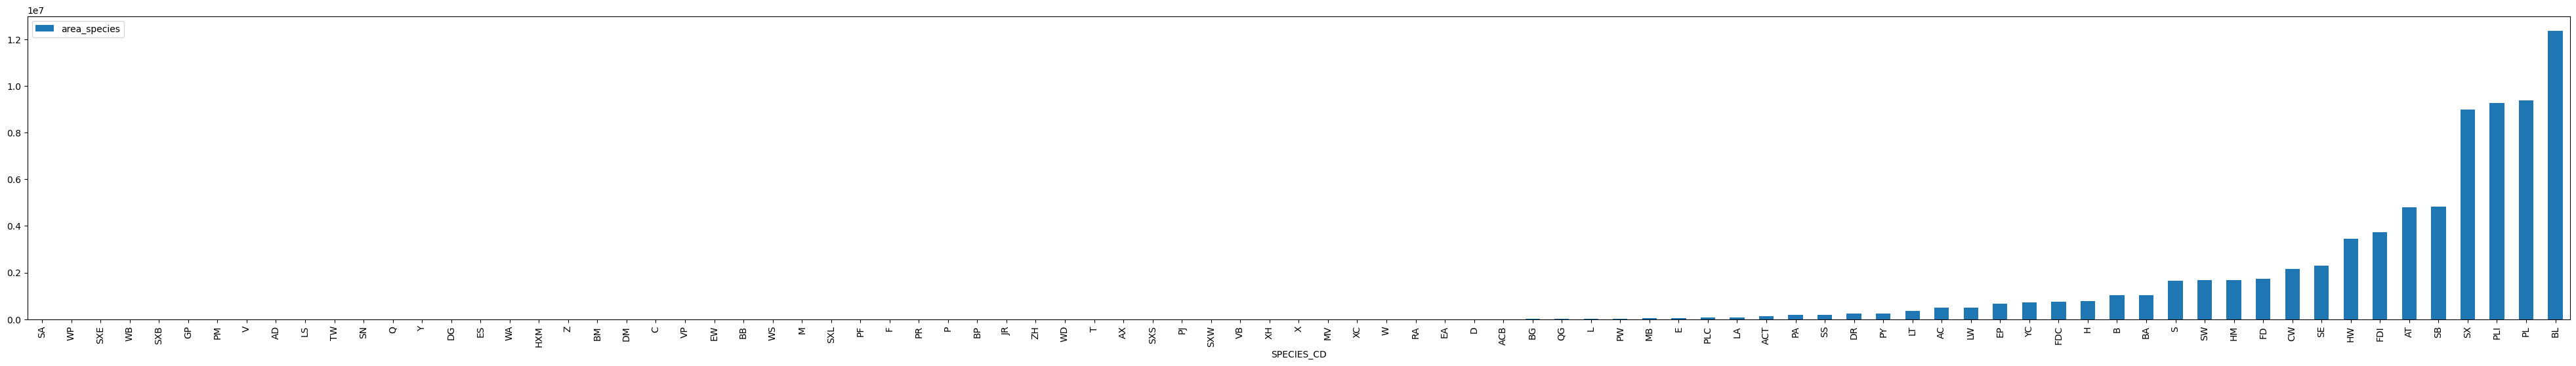

In [202]:
# Set the figure size
VRI3.groupby('SPECIES_CD')['area_species'].sum().reset_index().sort_values(by='area_species').plot(x='SPECIES_CD',y='area_species',kind='bar',figsize=(50, 6))


In [203]:
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)
species_area=VRI3.groupby('SPECIES_CD')['area_species'].sum().reset_index().sort_values(by='area_species')
species_area.rename(columns={'area_species':'area_species_total'},inplace=True)
species_area


,SPECIES_CD,area_species_total
57,SA,4.461022e-01
78,WP,5.176886e-01
65,SXE,1.225427e+00
76,WB,1.565102e+00
64,SXB,1.983858e+00
28,GP,2.285723e+00
49,PM,2.448125e+00
71,V,2.568254e+00
3,AD,2.616739e+00
36,LS,4.502946e+00


In [204]:
#remove species less than 10000 ha
#remove stands > 400 years old

VRI3=VRI3[VRI3.PROJ_AGE<400]

VRI3=pd.merge(VRI3,species_area, on='SPECIES_CD', how='inner')

VRI3=VRI3[VRI3.area_species_total>10000]

In [206]:
VRI3[VRI3.area_species==0]
#VRI3[VRI3.POLYGON_AREA<1]


,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,LAYER_ID,SPECIES_CD,SPECIES_PCT,PROJ_AGE,PROJ_AGE_CLASS_CD,PROJ_HEIGHT,PROJ_HEIGHT_CLASS_CD,partner,order,age_bin,area_species,area_species_total
8360835,15667945,78908775,0.0,0.0,1,PLI,100.0,18.0,1.0,4.0,1.0,NaN,1,"(0.0, 20.0]",0.0,9.249487e+06


In [225]:
VRI3[VRI3.age_bin.isna()]

,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,LAYER_ID,SPECIES_CD,SPECIES_PCT,PROJ_AGE,PROJ_AGE_CLASS_CD,PROJ_HEIGHT,PROJ_HEIGHT_CLASS_CD,partner,order,age_bin,area_species,area_species_total,age_bin_num
1365860,9094700,46088071,44.197432,441974.3216,1,SX,30.0,0.0,0.0,0.0,0.0,PLI,2,NaN,13.259230,8.982892e+06,NaN
1369746,9321439,56694551,4.556485,45564.8476,1,SX,40.0,0.0,0.0,0.0,0.0,PLI,2,NaN,1.822594,8.982892e+06,NaN
2373363,17924411,70579913,2.819624,28196.2408,1,SX,30.0,0.0,0.0,0.0,0.0,FDI,2,NaN,0.845887,8.982892e+06,NaN
5216743,17567292,21704359,2.885356,28853.5611,1,CW,30.0,0.0,0.0,0.0,0.0,FDC,2,NaN,0.865607,2.165494e+06,NaN
5219408,17614809,71944160,5.703326,57033.2595,1,CW,20.0,0.0,0.0,0.0,0.0,HW,2,NaN,1.140665,2.165494e+06,NaN
5225224,17938989,77522335,1.295537,12955.3677,1,CW,33.0,0.0,0.0,0.0,0.0,FDI,2,NaN,0.427527,2.165494e+06,NaN
5225227,17938993,80682319,1.623232,16232.3213,1,CW,33.0,0.0,0.0,0.0,0.0,FDI,2,NaN,0.535667,2.165494e+06,NaN
5225539,17941936,49027216,1.715265,17152.6462,1,CW,23.0,0.0,0.0,0.0,0.0,SX,2,NaN,0.394511,2.165494e+06,NaN
5225540,17941938,45777319,1.298537,12985.3731,1,CW,23.0,0.0,0.0,0.0,0.0,SX,2,NaN,0.298664,2.165494e+06,NaN
5418296,17944431,88438705,6.205514,62055.1377,1,LW,40.0,0.0,0.0,0.0,0.0,FDI,2,NaN,2.482206,5.090580e+05,NaN


In [224]:
VRIgroup=VRI3.groupby(['SPECIES_CD','age_bin','PROJ_HEIGHT_CLASS_CD','partner'],dropna=False)['area_species'].sum().reset_index().sort_values(by='area_species').reset_index(drop=True)

#where VRI group area_species >0
VRIgroup


/var/folders/z8/bdfgj46n0f35hl782vtp2zdm0000gr/T/ipykernel_55277/1132034024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  VRIgroup=VRI3.groupby(['SPECIES_CD','age_bin','PROJ_HEIGHT_CLASS_CD','partner'],dropna=False)['area_species'].sum().reset_index().sort_values(by='area_species').reset_index(drop=True)


,SPECIES_CD,age_bin,PROJ_HEIGHT_CLASS_CD,partner,area_species
0,YC,NaN,NaN,RA,0.000000
1,YC,NaN,NaN,S,0.000000
2,YC,NaN,NaN,SA,0.000000
3,YC,NaN,NaN,SB,0.000000
4,YC,NaN,NaN,SE,0.000000
5,YC,NaN,NaN,SN,0.000000
6,YC,NaN,NaN,SS,0.000000
7,YC,NaN,NaN,SW,0.000000
8,YC,NaN,NaN,SX,0.000000
9,YC,NaN,NaN,SXB,0.000000


In [220]:
VRI3['age_bin_num'] = pd.cut(VRI3['PROJ_AGE'], bins=bin_edges, labels=False)
VRI3.age_bin_num

0            5.0
1            3.0
2            3.0
3            4.0
4            8.0
5            3.0
6            4.0
7            2.0
8            2.0
9            4.0
10           8.0
11           6.0
12           2.0
13           9.0
14           6.0
15           6.0
16           5.0
17           6.0
18           4.0
19           3.0
20           9.0
21           6.0
22           3.0
23           8.0
24           2.0
25           2.0
26           6.0
27           5.0
28           2.0
29           3.0
30           6.0
31           3.0
32           5.0
33           4.0
34           5.0
35           8.0
36           4.0
37           6.0
38           9.0
39           7.0
40           6.0
41           9.0
42           8.0
43           7.0
44           4.0
45           4.0
46           4.0
47           5.0
48           9.0
49           1.0
            ... 
10235773     8.0
10235774     5.0
10235775     5.0
10235776    11.0
10235777     5.0
10235778     5.0
10235779    11.0
10235780     9

In [222]:
VRI3.partner.unique()

array(['PL', 'SX', nan, 'AT', 'PY', 'EP', 'LW', 'E', 'CW', 'L', 'S', 'PW',
       'AC', 'ACT', 'HW', 'SE', 'BL', 'H', 'PA', 'SW', 'B', 'BA', 'HM',
       'DR', 'BG', 'YC', 'MB', 'W', 'MV', 'LT', 'SS', 'PLI', 'LA', 'D',
       'PF', 'FDI', 'SB', 'VB', 'FD', 'SXW', 'FDC', 'WS', 'ACB', 'T', 'P',
       'PJ', 'EA', 'X', 'AX', 'BM', 'SXS', 'PLC', 'V', 'LS', 'BB', 'PR',
       'AD', 'SN', 'XH', 'SXB', 'DM', 'PM', 'ES', 'SXL', 'F', 'EW', 'XC',
       'Q', 'SXE', 'ZH', 'RA', 'HXM', 'Y', 'QG', 'TW', 'M', 'C', 'SA',
       'BP', 'JR', 'GP', 'WB', 'WD', 'DG', 'WP', 'WA', 'VP'], dtype=object)

In [221]:
VRI3.groupby(['SPECIES_CD','age_bin_num','PROJ_HEIGHT_CLASS_CD','partner'])['area_species'].sum().reset_index().sort_values(by='area_species').reset_index(drop=True)


,SPECIES_CD,age_bin_num,PROJ_HEIGHT_CLASS_CD,partner,area_species
0,PW,0.0,1.0,PL,0.009123
1,PL,0.0,1.0,PW,0.009184
2,SS,4.0,2.0,DR,0.017891
3,SS,9.0,1.0,HW,0.018265
4,FD,14.0,5.0,BG,0.020291
5,YC,11.0,5.0,PL,0.032726
6,PW,5.0,4.0,SE,0.034509
7,ACT,6.0,3.0,DR,0.042898
8,MB,10.0,5.0,FDC,0.043762
9,SS,16.0,6.0,FDC,0.043912


In [216]:
VRI3.age_bin.unique().max()

[(100.0, 120.0], (60.0, 80.0], (80.0, 100.0], (160.0, 180.0], (40.0, 60.0], ..., (340.0, 360.0], (0.0, 20.0], (300.0, 320.0], (360.0, 380.0], NaN]
Length: 21
Categories (47, interval[float64, right]): [(0.0, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 80.0] ... (860.0, 880.0] < (880.0, 900.0] < (900.0, 920.0] < (920.0, 940.0]]

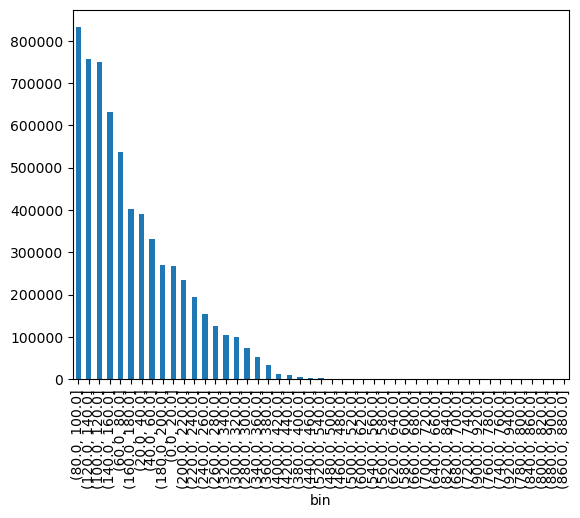

In [126]:
# Plot the histogram ordered by counts
VRI['bin'].value_counts().plot(kind='bar')

# Show the plot
plt.show()

# Show the plot
#plt.show()

In [61]:
# Group the data by FEATURE_ID and count the number of unique LAYER_ID values
layer_counts = VRI.groupby(['FEATURE_ID','POLYGON_ID','LAYER_ID'])[['FEATURE_ID','POLYGON_ID','LAYER_ID']]

layer_counts = VRI.groupby(['FEATURE_ID','POLYGON_ID','LAYER_ID'])[['FEATURE_ID','POLYGON_ID','LAYER_ID']]

layer_counts = VRI.groupby(['FEATURE_ID','POLYGON_ID','LAYER_ID'])[['FEATURE_ID','POLYGON_ID','LAYER_ID']]

# Sort the counts in descending order
#sorted_counts = unique_layer_counts.sort_values(ascending=False)

# Get the FEATURE_IDs with the largest number of unique LAYER_ID values
#largest_feature_ids = sorted_counts[sorted_counts == sorted_counts.max()].index

# Print the FEATURE_IDs
#print(largest_feature_ids)


In [63]:
print(len(layer_counts),len(VRI))

6368678 6368678


In [22]:
VRI[VRI.FEATURE_ID==18506223]

,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,LAYER_ID,CROWN_CLOSURE,SPECIES_CD_1,SPECIES_name_1,SPECIES_PCT_1,SPECIES_CD_2,SPECIES_name_2,SPECIES_PCT_2,PROJ_AGE_1,PROJ_AGE_CLASS_CD_1,PROJ_AGE_2,PROJ_AGE_CLASS_CD_2,PROJ_HEIGHT_1,PROJ_HEIGHT_CLASS_CD_1,PROJ_HEIGHT_2,PROJ_HEIGHT_CLASS_CD_2
1164273,18506223,97256240,24.3,243047.6248,1,15.0,FDI,Douglas Fir (Interior),55.000000,LW,Western Larch,45.000000,126.0,7.0,126.0,7.0,27.1,3.0,27.6,3.0
1164275,18506223,97256240,24.3,243047.6248,2,5.0,FDI,Douglas Fir (Interior),50.000000,LW,Western Larch,40.000000,78.0,4.0,93.0,5.0,21.6,3.0,15.7,2.0
1164274,18506223,97256240,24.3,243047.6248,3,4.0,FDI,Douglas Fir (Interior),40.099998,LW,Western Larch,39.900002,78.0,4.0,71.0,4.0,12.8,2.0,13.6,2.0
1164276,18506223,97256240,24.3,243047.6248,4,5.0,FDI,Douglas Fir (Interior),80.000000,PLI,Lodgepole Pine (Interior),20.000000,24.0,2.0,21.0,2.0,5.8,1.0,6.2,1.0
1164272,18506223,97256240,24.3,243047.6248,5,2.0,FDI,Douglas Fir (Interior),80.000000,PLI,Lodgepole Pine (Interior),20.000000,15.0,1.0,12.0,1.0,2.7,1.0,2.8,1.0


In [ ]:
#Code to explore the gdb files, they are massive so easiest approace is to explore then use ogr2ogr to extract the relevant columns

In [25]:
import geopandas as gpd
import fiona

# Define the path to the FGDB file
fgdb_file = "VEG_COMP_POLY_AND_LAYER_2022.gdb"



# List all layers in the FGDB file

layers = fiona.listlayers(fgdb_file)

# Load a layer into a GeoDataFrame
gdf0 = gpd.read_file(fgdb_file, layer=layers[0],rows=1000)

feature_list=['FEATURE_ID',
 'LAYER_ID',
'CROWN_CLOSURE',
'SPECIES_CD_1',
 'SPECIES_PCT_1',
 'SPECIES_CD_2',
 'SPECIES_PCT_2',
 'PROJ_AGE_1',
 'PROJ_AGE_CLASS_CD_1',
 'PROJ_AGE_2',
 'PROJ_AGE_CLASS_CD_2',
 'PROJ_HEIGHT_1',
 'PROJ_HEIGHT_CLASS_CD_1',
 'PROJ_HEIGHT_2',
 'PROJ_HEIGHT_CLASS_CD_2']

gdf1 = gpd.read_file(fgdb_file, layer=layers[1],rows=1000,usecols=feature_list)

# Print the GeoDataFrame
#gdf

In [54]:
#describe the layers
layers

['VEG_COMP_POLY', 'VEG_COMP_LAYER']

In [56]:
gdf0
COAST_INTERIOR_CD,SOIL_MOISTURE_REGIME_1

,FEATURE_ID,MAP_ID,POLYGON_ID,OPENING_IND,OPENING_SOURCE,OPENING_NUMBER,FEATURE_CLASS_SKEY,INVENTORY_STANDARD_CD,POLYGON_AREA,NON_PRODUCTIVE_DESCRIPTOR_CD,NON_PRODUCTIVE_CD,INPUT_DATE,COAST_INTERIOR_CD,SURFACE_EXPRESSION,MODIFYING_PROCESS,SITE_POSITION_MESO,ALPINE_DESIGNATION,SOIL_NUTRIENT_REGIME,ECOSYS_CLASS_DATA_SRC_CD,BCLCS_LEVEL_1,BCLCS_LEVEL_2,BCLCS_LEVEL_3,BCLCS_LEVEL_4,BCLCS_LEVEL_5,INTERPRETATION_DATE,PROJECT,REFERENCE_YEAR,SPECIAL_CRUISE_NUMBER,SPECIAL_CRUISE_NUMBER_CD,INVENTORY_REGION,COMPARTMENT,COMPARTMENT_LETTER,FIZ_CD,FOR_MGMT_LAND_BASE_IND,ATTRIBUTION_BASE_DATE,PROJECTED_DATE,SHRUB_HEIGHT,SHRUB_CROWN_CLOSURE,SHRUB_COVER_PATTERN,HERB_COVER_TYPE,HERB_COVER_PATTERN,HERB_COVER_PCT,BRYOID_COVER_PCT,NON_VEG_COVER_PATTERN_1,NON_VEG_COVER_PCT_1,NON_VEG_COVER_TYPE_1,NON_VEG_COVER_PATTERN_2,NON_VEG_COVER_PCT_2,NON_VEG_COVER_TYPE_2,NON_VEG_COVER_PATTERN_3,NON_VEG_COVER_PCT_3,NON_VEG_COVER_TYPE_3,LAND_COVER_CLASS_CD_1,EST_COVERAGE_PCT_1,SOIL_MOISTURE_REGIME_1,LAND_COVER_CLASS_CD_2,EST_COVERAGE_PCT_2,SOIL_MOISTURE_REGIME_2,LAND_COVER_CLASS_CD_3,EST_COVERAGE_PCT_3,SOIL_MOISTURE_REGIME_3,AVAIL_LABEL_HEIGHT,AVAIL_LABEL_WIDTH,FULL_LABEL,LABEL_CENTRE_X,LABEL_CENTRE_Y,LABEL_HEIGHT,LABEL_WIDTH,LINE_1_OPENING_NUMBER,LINE_1_OPENING_SYMBOL_CD,LINE_2_POLYGON_ID,LINE_3_TREE_SPECIES,LINE_4_CLASSES_INDEXES,LINE_5_VEGETATION_COVER,LINE_6_SITE_PREP_HISTORY,LINE_7_ACTIVITY_HIST_SYMBOL,LINE_7A_STAND_TENDING_HISTORY,LINE_7B_DISTURBANCE_HISTORY,LINE_8_PLANTING_HISTORY,PRINTABLE_IND,SMALL_LABEL,OPENING_ID,ORG_UNIT_NO,ORG_UNIT_CODE,ADJUSTED_IND,BEC_ZONE_CODE,BEC_SUBZONE,BEC_VARIANT,BEC_PHASE,CFS_ECOZONE,EARLIEST_NONLOGGING_DIST_TYPE,EARLIEST_NONLOGGING_DIST_DATE,STAND_PERCENTAGE_DEAD,FREE_TO_GROW_IND,HARVEST_DATE,SE_ANNO_CAD_DATA,FEATURE_AREA_SQM,FEATURE_LENGTH_M,GEOMETRY_AREA,GEOMETRY_LEN,Shape_Length,Shape_Area,geometry
0,3614486,103H052,455,N,7,None,843,F,0.2,L,15,1997-06-25 00:00:00+00:00,C,None,None,None,None,None,None,N,W,W,None,LA,1992-01-01 00:00:00+00:00,INCOSADA_ROLLOVER,1992,None,None,61,48,None,A,N,1992-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,17,17,455\L,755430,956805,60,54,None,None,455,None,None,L,None,None,None,None,None,N,455,None,32,DKM,N,CWH,vh,2,None,13,None,NaT,None,N,NaT,None,2.134647e+03,188.9009,0.0,0.0,188.900867,2.134647e+03,"MULTIPOLYGON (((755397.623 956835.591, 755406...."
1,3601726,103H026,49,N,7,None,843,F,0.7,L,15,1997-04-04 00:00:00+00:00,C,None,None,None,None,None,None,N,W,W,None,LA,1992-01-01 00:00:00+00:00,INCOSADA_ROLLOVER,1992,None,None,61,71,None,A,N,1992-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,30,30,49\L,806325,924328,60,36,None,None,49,None,None,L,None,None,None,None,None,N,49,None,32,DKM,N,CWH,vm,1,None,13,None,NaT,None,N,NaT,None,6.901566e+03,388.0348,0.0,0.0,388.034779,6.901566e+03,"MULTIPOLYGON (((806288.451 924316.837, 806285...."
2,3603090,103H032,719,N,7,None,843,F,1.2,L,15,1997-05-14 00:00:00+00:00,C,None,None,None,None,None,None,N,W,W,None,LA,1992-01-01 00:00:00+00:00,INCOSADA_ROLLOVER,1992,None,None,61,53,None,A,N,1992-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,43,43,719\L,758596,929529,60,54,None,None,719,None,None,L,None,None,None,None,None,N,719,None,32,DKM,N,CWH,vh,2,None,13,None,NaT,None,N,NaT,None,1.206879e+04,509.7147,0.0,0.0,509.714742,1.206879e+04,"MULTIPOLYGON (((758598.845 929586.213, 758600...."
3,3703295,103P033,259,N,7,None,843,F,400.0,NPBR,11,1997-08-26 00:00:00+00:00,C,None,None,None,None,None,None,V,N,U,SL,OP,1994-01-01 00:00:00+00:00,INCOSADA_ROLLOVER,1994,None,None,75,92,None,A,N,1994-01-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [98]:
list(gdf1)




['FEATURE_ID',
 'LAYER_ID',
 'FOR_COVER_RANK_CD',
 'NON_FOREST_DESCRIPTOR',
 'INTERPRETED_DATA_SRC_CD',
 'QUAD_DIAM_125',
 'QUAD_DIAM_175',
 'QUAD_DIAM_225',
 'EST_SITE_INDEX_SPECIES_CD',
 'EST_SITE_INDEX',
 'EST_SITE_INDEX_SOURCE_CD',
 'CROWN_CLOSURE',
 'CROWN_CLOSURE_CLASS_CD',
 'REFERENCE_DATE',
 'SITE_INDEX',
 'DBH_LIMIT',
 'BASAL_AREA',
 'DATA_SOURCE_BASAL_AREA_CD',
 'VRI_LIVE_STEMS_PER_HA',
 'DATA_SRC_VRI_LIVE_STEM_HA_CD',
 'VRI_DEAD_STEMS_PER_HA',
 'TREE_COVER_PATTERN',
 'VERTICAL_COMPLEXITY',
 'SPECIES_CD_1',
 'SPECIES_PCT_1',
 'SPECIES_CD_2',
 'SPECIES_PCT_2',
 'SPECIES_CD_3',
 'SPECIES_PCT_3',
 'SPECIES_CD_4',
 'SPECIES_PCT_4',
 'SPECIES_CD_5',
 'SPECIES_PCT_5',
 'SPECIES_CD_6',
 'SPECIES_PCT_6',
 'PROJ_AGE_1',
 'PROJ_AGE_CLASS_CD_1',
 'PROJ_AGE_2',
 'PROJ_AGE_CLASS_CD_2',
 'DATA_SOURCE_AGE_CD',
 'PROJ_HEIGHT_1',
 'PROJ_HEIGHT_CLASS_CD_1',
 'PROJ_HEIGHT_2',
 'PROJ_HEIGHT_CLASS_CD_2',
 'DATA_SOURCE_HEIGHT_CD',
 'LIVE_VOL_PER_HA_SPP1_125',
 'LIVE_VOL_PER_HA_SPP1_175',
 'LIVE_VO

In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt

provinces = gpd.read_file("./lpr_000b16a_e")  # note that I point to the shapefile "directory" containg all the individual files
#provinces = provinces.to_crs("EPSG:4326")    # I'll explain this later, I'm converting to a different coordinate reference system
provinces.crs
provinces = provinces.to_crs("EPSG:3005") 

<Axes: >

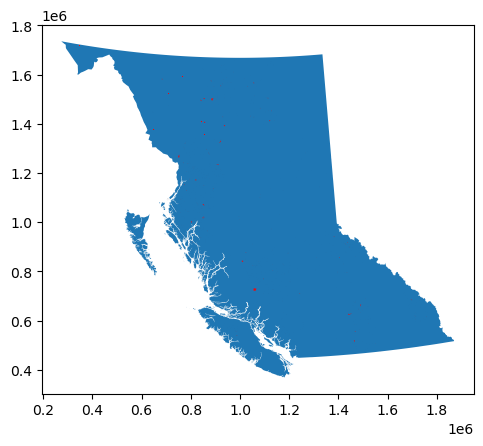

In [96]:
#gdf0.crs
ax=provinces[provinces.PRENAME=='British Columbia'].plot()
#provinces
gdf0.plot(ax=ax, color='red')

In [80]:
gdf0.crs

<Projected CRS: EPSG:3005>
Name: NAD83 / BC Albers
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - British Columbia.
- bounds: (-139.04, 48.25, -114.08, 60.01)
Coordinate Operation:
- name: British Columbia Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [86]:
provinces.crs= gdf0.crs

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a GeoDataFrame with the boundaries of provinces
provinces = gpd.read_file('path_to_your_file.shp')

# Select the row for British Columbia
bc = provinces[provinces['name'] == 'British Columbia']

# Plot the outline of British Columbia
bc.plot()

# Show the plot
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a GeoDataFrame with the boundaries of countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Select the row for Canada
canada = world[world['name'] == 'Canada']

# Plot the outline of Canada
canada.plot()

# Show the plot
plt.show()

In [28]:
counts = VEG_POLY_FILTERED['FEATURE_ID'].value_counts().sort_values(ascending=False)
counts

FEATURE_ID
3660171     1
18402321    1
3614486     1
3601726     1
3603090     1
           ..
18849749    1
18628164    1
18899382    1
18905390    1
19234916    1
Name: count, Length: 5973855, dtype: int64

In [33]:
gdf1.to_csv("features.csv")
gdf0.to_csv("polygon.csv")

In [30]:
valentines=pd.merge(gdf0, gdf1, on='FEATURE_ID', how='inner')
valentines.to_excel('valentines.xlsx')

In [31]:
valentines

,FEATURE_ID,MAP_ID,POLYGON_ID,OPENING_IND,OPENING_SOURCE,OPENING_NUMBER,FEATURE_CLASS_SKEY,INVENTORY_STANDARD_CD,POLYGON_AREA,NON_PRODUCTIVE_DESCRIPTOR_CD,...,DEAD_STAND_VOLUME_125,DEAD_STAND_VOLUME_175,DEAD_STAND_VOLUME_225,WHOLE_STEM_BIOMASS_PER_HA,BRANCH_BIOMASS_PER_HA,FOLIAGE_BIOMASS_PER_HA,BARK_BIOMASS_PER_HA,ORG_UNIT_NO_y,ORG_UNIT_CODE_y,geometry_y


In [68]:
# Assuming VEG_POLY_FILTERED is a DataFrame and polygon_ID is the column you want to count
VEG_POLY_FILTERED['polycounts'] = VEG_POLY_FILTERED['POLYGON_ID'].value_counts()

In [69]:
# Sort VEG_POLY_FILTERED by the polycounts column in descending order
sorted_df = VEG_POLY_FILTERED.sort_values(['polycounts','POLYGON_ID'], ascending=False)

sorted_df.head(100)

,FEATURE_ID,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,GEOMETRY_AREA,polycounts
12,5448382,501,0.6,6.205302e+03,0,1898.0
4,3598407,872,2.0,2.000486e+04,0,1890.0
3,3703295,259,400.0,3.999504e+06,0,1890.0
11,5448492,336,148.1,1.480572e+06,0,1889.0
16,5196988,90,56.3,5.626087e+05,0,1887.0
...,...,...,...,...,...,...
99,5417798,628,1.1,1.116526e+04,0,1559.0
94,4654407,275,4.7,4.678872e+04,0,1558.0
95,4337337,336,0.7,7.441498e+03,0,1553.0
103,4142937,13,729.8,7.298234e+06,0,1545.0


In [70]:
# Specify the POLYGON_ID value you're interested in
polygon_id_value = 501

# Filter the DataFrame
filtered_df = VEG_POLY_FILTERED[VEG_POLY_FILTERED['POLYGON_ID'] == polygon_id_value]

print(filtered_df)

         FEATURE_ID  POLYGON_ID  POLYGON_AREA  FEATURE_AREA_SQM  \
12          5448382         501           0.6         6205.3019   
3016        4049772         501          11.4       114474.9131   
11759       3230466         501           3.3        33053.9429   
12902       3378558         501           1.8        18425.1549   
14413       4010933         501           2.0        19982.8071   
...             ...         ...           ...               ...   
5922148     1865282         501          12.3       122605.9944   
5927375     5426288         501          38.2       381526.7070   
5942391     4058141         501           6.3        62920.9016   
5943872     5431422         501          14.3       143146.4423   
5953725     4258406         501           4.0        40408.7181   

         GEOMETRY_AREA  polycounts  
12                   0      1898.0  
3016                 0        10.0  
11759                0         NaN  
12902                0         NaN  
14413     

In [74]:
filtered_df = MERGED[MERGED['POLYGON_ID'] == polygon_id_value]



,FEATURE_ID,LAYER_ID,CROWN_CLOSURE,SPECIES_CD_1,SPECIES_PCT_1,SPECIES_CD_2,SPECIES_PCT_2,PROJ_AGE_1,PROJ_AGE_CLASS_CD_1,PROJ_AGE_2,PROJ_AGE_CLASS_CD_2,PROJ_HEIGHT_1,PROJ_HEIGHT_CLASS_CD_1,PROJ_HEIGHT_2,PROJ_HEIGHT_CLASS_CD_2,POLYGON_ID,POLYGON_AREA,FEATURE_AREA_SQM,GEOMETRY_AREA,polycounts
137667,1825924,1,70.0,FD,70.0,L,20.0,120.0,6.0,NaN,NaN,37.200001,4.0,NaN,NaN,501,49.6,496210.3425,0,NaN
424145,1831888,1,25.0,FD,80.0,AT,20.0,82.0,5.0,NaN,NaN,22.299999,3.0,NaN,NaN,501,11.3,112693.0896,0,NaN
424146,1831888,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,11.3,112693.0896,0,NaN
2933522,1835334,1,45.0,SE,60.0,BL,40.0,159.0,8.0,159.0,8.0,33.799999,4.0,27.500000,3.0,501,18.0,179666.2922,0,1.0
5102426,1853932,1,40.0,FD,70.0,PY,20.0,137.0,7.0,NaN,NaN,30.200001,4.0,NaN,NaN,501,13.5,134754.6241,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626975,6452874,1,50.0,B,60.0,S,20.0,210.0,8.0,NaN,NaN,23.000000,3.0,NaN,NaN,501,15.5,154927.8652,0,NaN
2443701,6559808,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,11.7,116942.7444,0,NaN
2505316,6589451,1,35.0,BL,100.0,NaN,NaN,316.0,9.0,NaN,NaN,19.299999,2.0,NaN,NaN,501,3.7,36595.4930,0,NaN
2902372,6735647,1,55.0,BL,80.0,SE,20.0,326.0,9.0,326.0,9.0,24.000000,3.0,26.700001,3.0,501,8.8,88082.6906,0,NaN
